# Paper Figures, Mapped Correlations, & other analysis figures 

This notebook will be used to:
- Show a map of the ecoregions used in this paper
- The coeficients of Lasso regression for each ecoregion. Variables that do not show up are not chosen by the Lasso. 
    - TODO: significance for chosen variables. 
- Show the historical variance explained by regularized regression for atmos and plant centric variables. 

The data shown in this notebook's figures are generated by train_burn_area_classifier.ipynb

In [1]:
# Chosen experiment
experiment = "better_beta" 

In [24]:
import numpy as np
from matplotlib import pylab as plt
from matplotlib import cm
from matplotlib import pyplot
import matplotlib.gridspec as gridspec
import matplotlib
import seaborn as sns
import pandas as pd 
import geopandas as geo
import seaborn as sns
import os
import pickle

In [3]:
dataDir = os.path.join('..', 'Data', 'Analysis', experiment)
geo_df_file = os.path.join(dataDir, 'results_geo_df')

#### Load the Lasso coeficient and $R^2$ values created by train_burn_area_classifier.ipynb
- This is a GeoDataGrame where the shapes and associated data are stored as a single data structure

In [4]:
divisions = geo.read_file(geo_df_file)
divisions.index = divisions.division
divisions.columns

Index(['AREA', 'division', 'OLS_r2', 'lasso_r2', 'lasso_alph', 'atmos_r2',
       'atmos_alph', 'plant_r2', 'plant_alph', 'geometry'],
      dtype='object')

In [5]:
usa = geo.read_file('../Data/GIS/cb_2017_us_state_500k')

Set static division colors 

In [6]:
n_div = divisions.shape[0]
tab10 = cm.get_cmap('tab10', n_div)
division_colors = tab10(range(n_div))
division_colors[0][0:3]
division_colors_hex = []
for i in range(n_div) :
    division_colors_hex.append(matplotlib.colors.to_hex(division_colors[i][0:3]))
    
division_colors_hex
divisions['division_colors'] = division_colors_hex

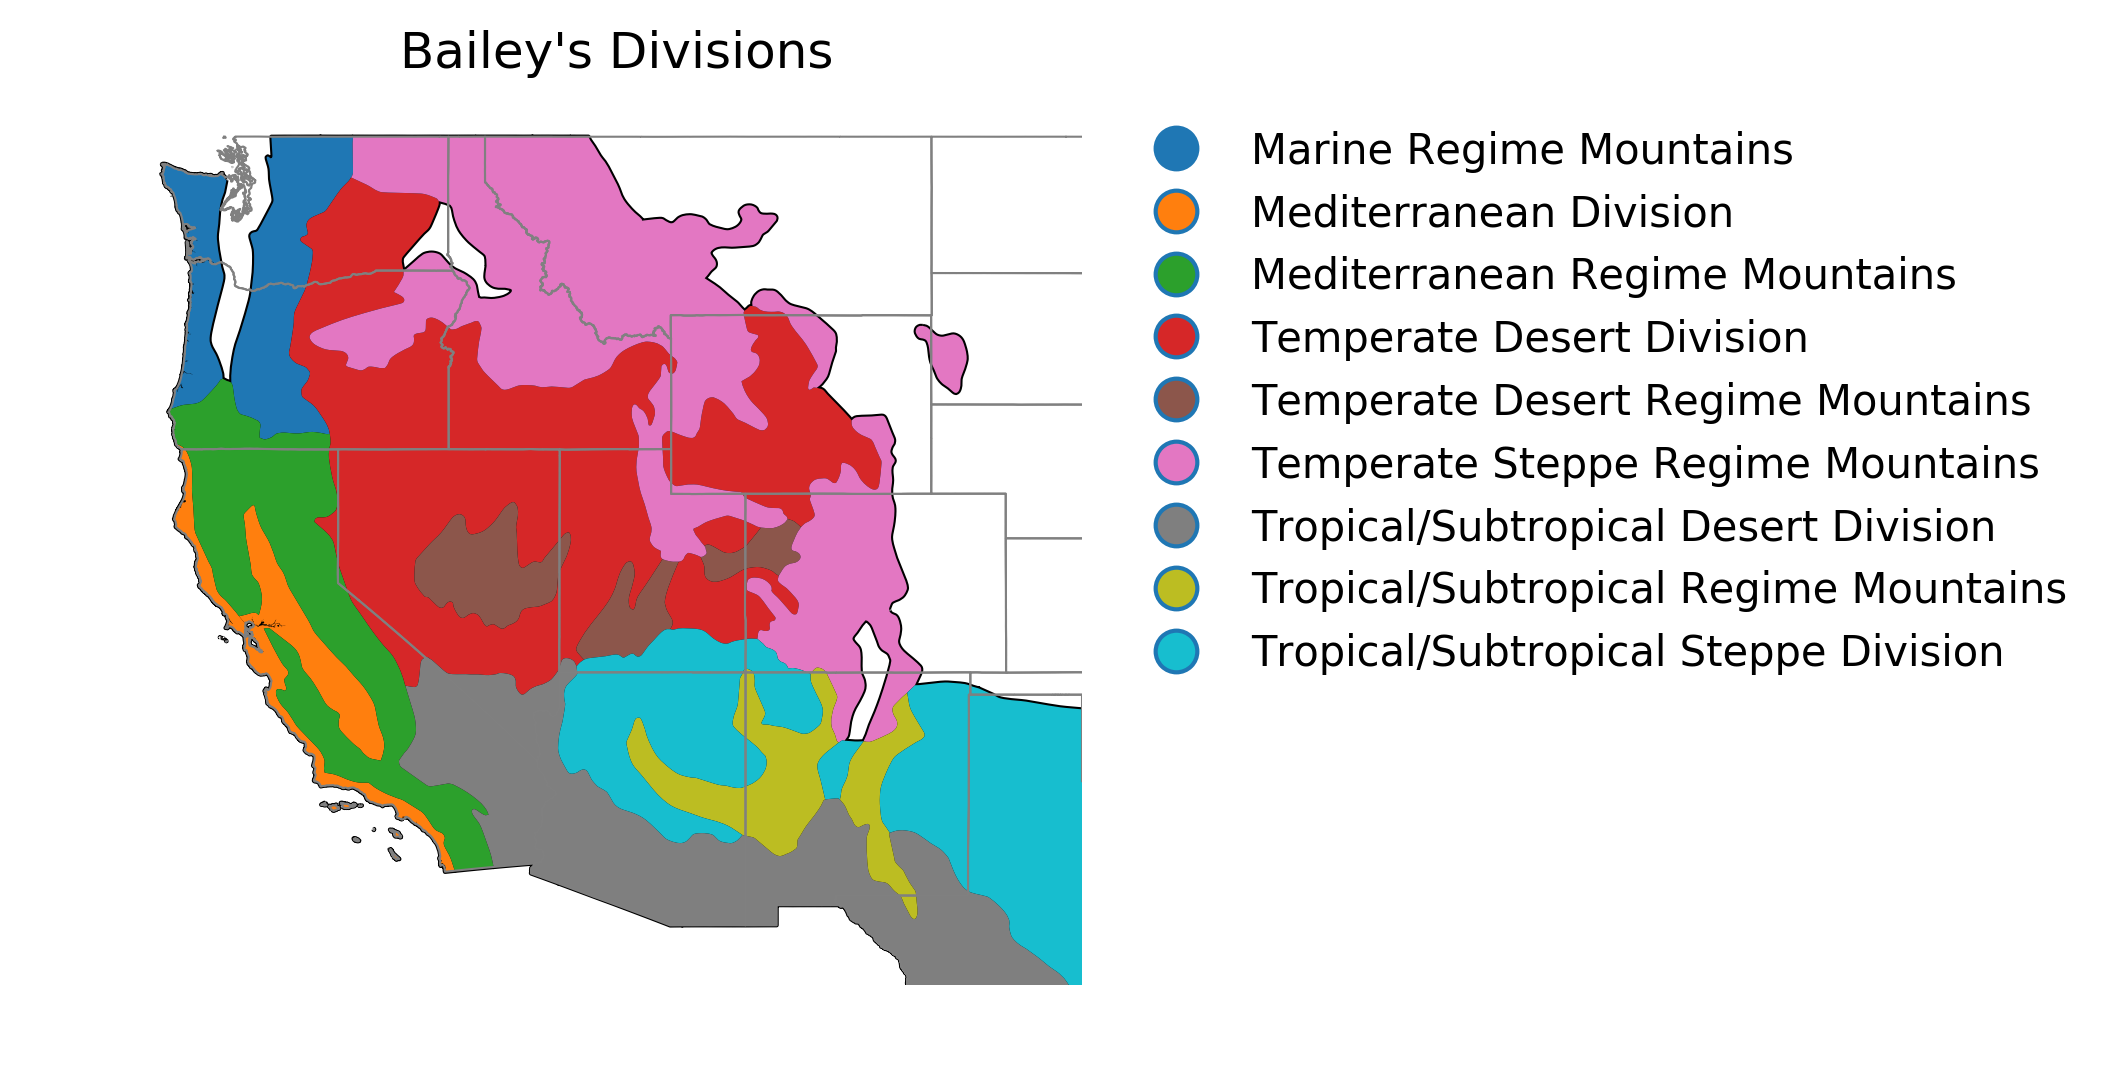

In [7]:
# Show the disolved divisions 
f, ax = plt.subplots(1, figsize=(4, 4), dpi=300)
ax.axis('off')

#base = usa.plot(ax=ax, color="white", edgecolor="black")
base = divisions.plot(ax=ax, color="white", edgecolor="black")
ax1 = divisions.plot(ax=base, column='division', cmap=tab10, categorical=True,legend=True)
ax1.set_xlim(left=-125, right=-100)
ax1.set_ylim(bottom=30, top=50)
plt.title("Bailey's Divisions")

ax2=usa.plot(ax=base, facecolor='none', edgecolor="gray", linewidth=0.5)
ax2.set_xlim(left=-125, right=-100)
ax2.set_ylim(bottom=30, top=50)
ax2.set_aspect(1.2)

# Handle the legend
leg = ax1.get_legend()
leg.set_bbox_to_anchor((0.6, 1, 1.5, 0.0))
leg.set_label(divisions.division)
leg.set_frame_on(False)
plt.savefig(fname=os.path.join(dataDir, "divinsions_map.png"), format='png', bbox_inches="tight")
plt.show()

### Show the variance explained by each of the linear models
- Not to be shown in paper, but important for back-end analysis purposes. 

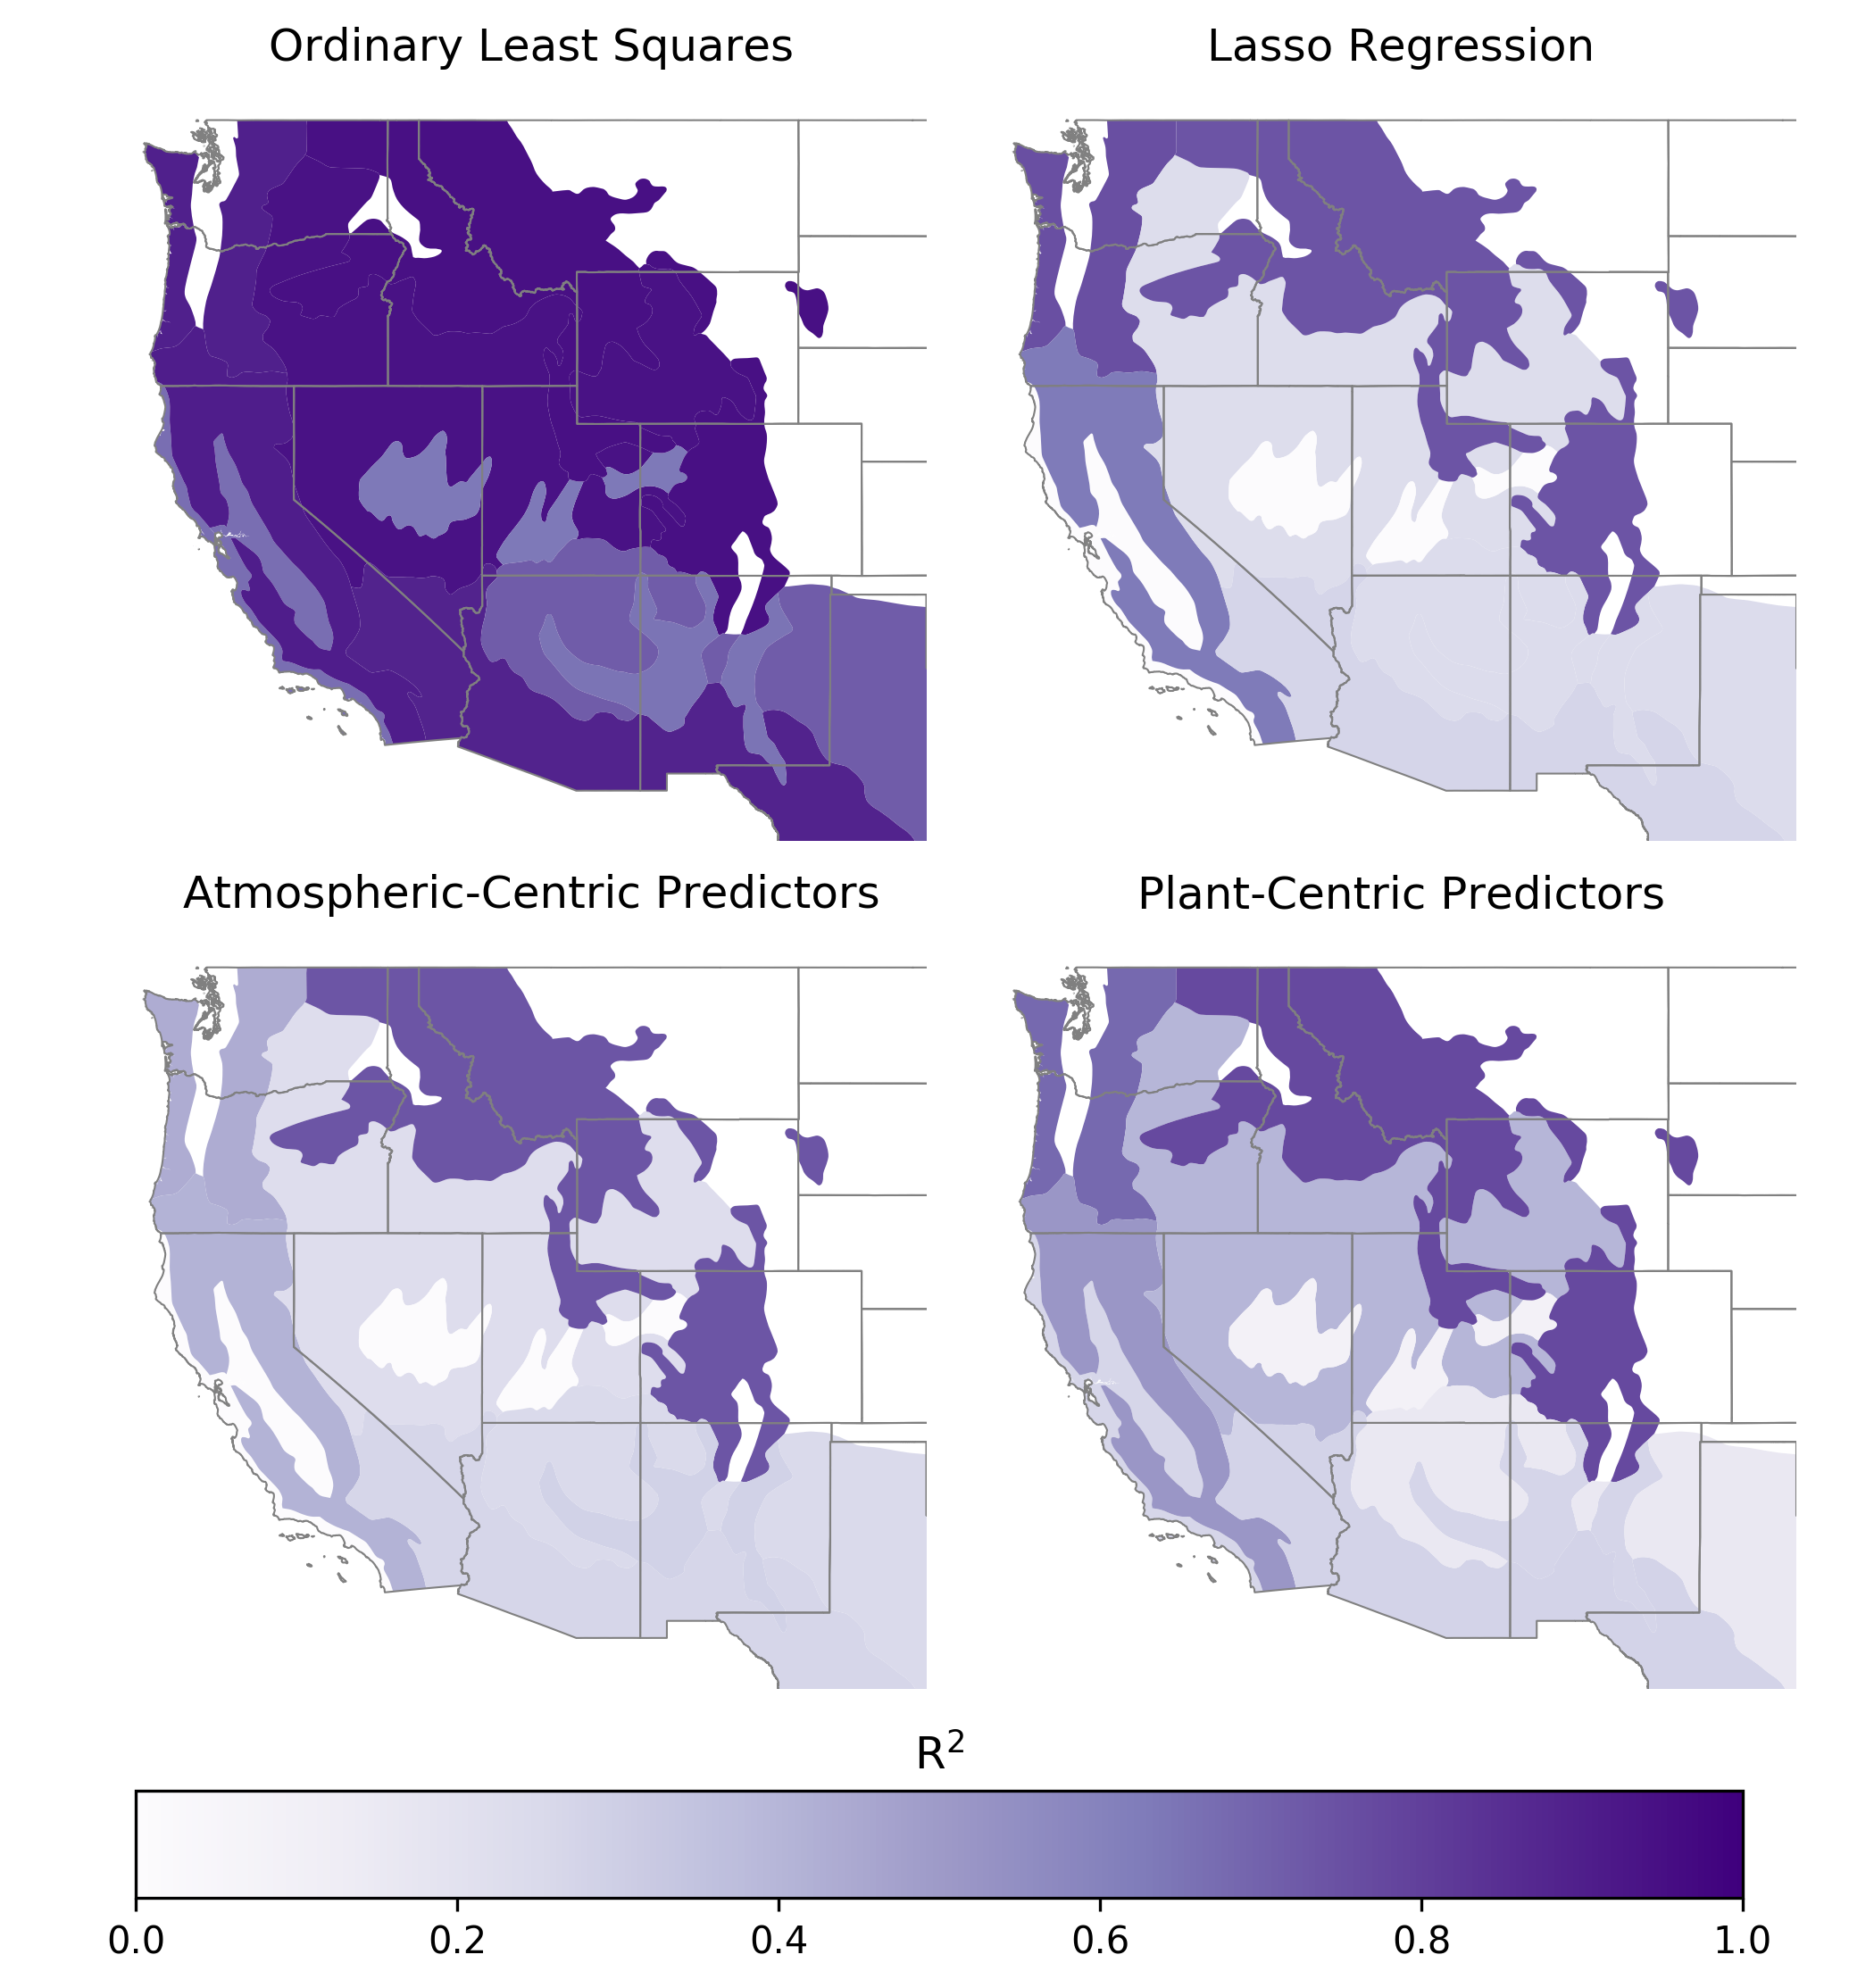

In [8]:
asp = 1.2 # aspect 
fig, (row1, row2) = pyplot.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(8, 8), dpi=300)
row1[0].axis('off')
row1[1].axis('off')
row2[0].axis('off')
row2[1].axis('off')
cm = "Purples"
divisions.plot(ax=row1[0], column='OLS_r2', vmin=0, vmax=1, legend=False, cmap=cm)
usa.plot(ax=row1[0], facecolor='none', edgecolor="gray", linewidth=0.5)
row1[0].set_xlim(left=-125, right=-100)
row1[0].set_ylim(bottom=30, top=50)
row1[0].set_title("Ordinary Least Squares")
row1[0].set_aspect(asp)

divisions.plot(ax=row1[1], column='lasso_r2', vmin=0, vmax=1, legend=False, cmap=cm)
usa.plot(ax=row1[1], facecolor='none', edgecolor="gray", linewidth=0.5)
row1[1].set_xlim(left=-125, right=-100)
row1[1].set_ylim(bottom=30, top=50)
row1[1].set_title("Lasso Regression")
row1[1].set_aspect(asp)

divisions.plot(ax=row2[0], column='atmos_r2', vmin=0, vmax=1, legend=False, cmap=cm)
usa.plot(ax=row2[0], facecolor='none', edgecolor="gray", linewidth=0.5)
row2[0].set_xlim(left=-125, right=-100)
row2[0].set_ylim(bottom=30, top=50)
row2[0].set_title("Atmospheric-Centric Predictors")
row2[0].set_aspect(asp)

divisions.plot(ax=row2[1], column='plant_r2', vmin=0, vmax=1, legend=False, cmap=cm)
usa.plot(ax=row2[1], facecolor='none', edgecolor="gray", linewidth=0.5)
row2[1].set_xlim(left=-125, right=-100)
row2[1].set_ylim(bottom=30, top=50)
row2[1].set_title("Plant-Centric Predictors")
row2[1].set_aspect(asp)

plt.subplots_adjust(wspace=0.1, hspace=0.1) # reduce spaces between panes

im = plt.gca().get_children()[0]
# [left, bottom, width, height]
# for horizontal bar
cax = fig.add_axes([0.25/2, 0.03, 0.75,0.05]) 
fig.colorbar(im, cax=cax, orientation="horizontal")
plt.title("R$^{2}$")
#cax = fig.add_axes([0.25, .2, 0.03, 0.4]) 
#fig.colorbar(im, cax=cax, orientation="vertical")
plt.savefig(os.path.join(dataDir, "variance_explained_map.png"), bbox_inches="tight")
plt.show()

# Figure 2
### Show only atmos- and plant-centric

The max R-squared value is 0.772443 


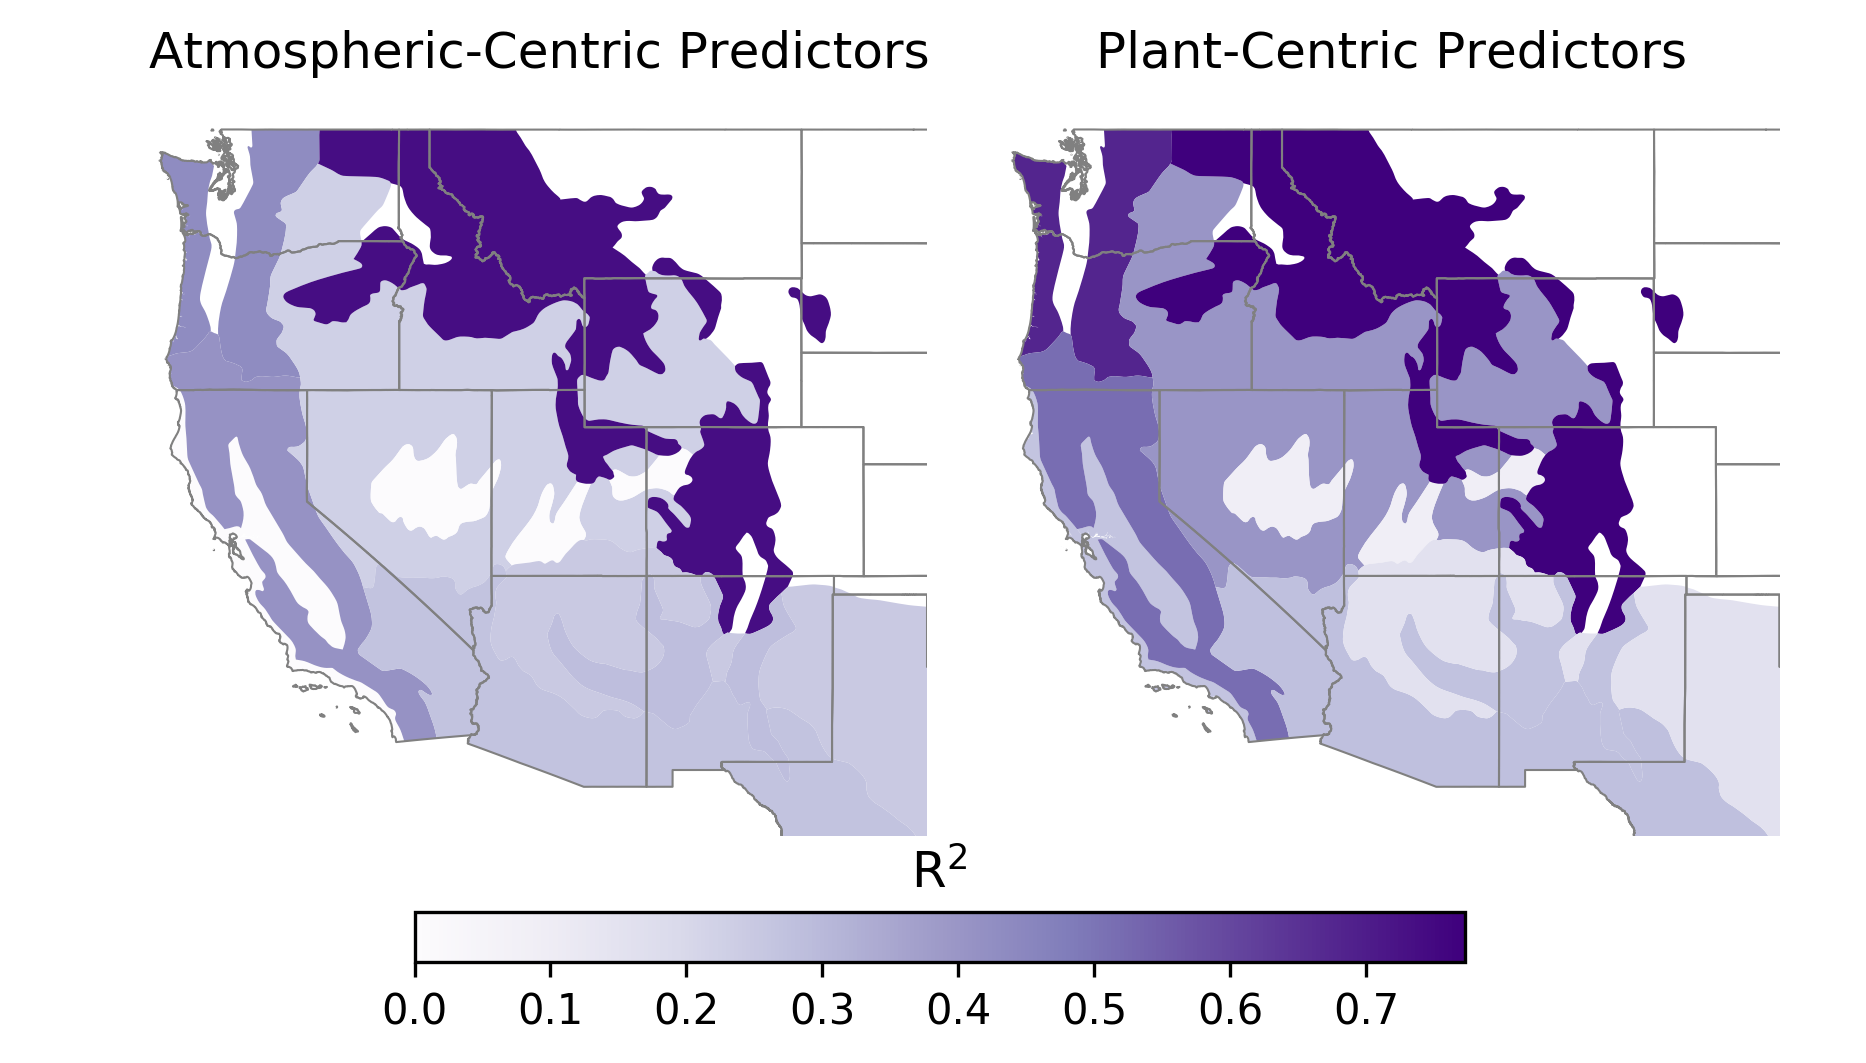

In [9]:
# Figure properties
asp=1.2
cm = "Purples"
max_r_squared = np.max((divisions["atmos_r2"], divisions["plant_r2"]) )
print("The max R-squared value is %f " % max_r_squared)
fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=True, sharey=True, figsize=(7, 3.3), dpi=300)
ax1.axis('off')
ax2.axis('off')

#fig.suptitle('1984-2016 Burn Area Variance Explained')

divisions.plot(ax=ax1, column='atmos_r2', vmin=0, vmax=max_r_squared, legend=False, cmap=cm)
usa.plot(ax=ax1, facecolor='none', edgecolor="gray", linewidth=0.5)
ax1.set_xlim(left=-125, right=-100)
ax1.set_ylim(bottom=30, top=50)
ax1.set_title("Atmospheric-Centric Predictors")
ax1.set_aspect(asp)


divisions.plot(ax=ax2, column='plant_r2', vmin=0, vmax=max_r_squared, legend=False, cmap=cm)
usa.plot(ax=ax2, facecolor='none', edgecolor="gray", linewidth=0.5)
ax2.set_xlim(left=-125, right=-100)
ax2.set_ylim(bottom=30, top=50)
ax2.set_title("Plant-Centric Predictors")
ax2.set_aspect(asp)

plt.subplots_adjust(wspace=0.1, hspace=0) # reduce spaces between panes

im = plt.gca().get_children()[0]
# [left, bottom, width, height]
# for horizontal bar
cax = fig.add_axes([0.25, 0, 0.5,0.05]) 
fig.colorbar(im, cax=cax, orientation="horizontal")
plt.title("R$^{2}$")
#cax = fig.add_axes([0.25, .2, 0.03, 0.4]) 
#fig.colorbar(im, cax=cax, orientation="vertical")
plt.savefig(os.path.join(dataDir, "plant_v_atmos_variance_explained_map.png"), bbox_inches="tight")
plt.show()

Create a matrix of coefs from the predicts and Lasso. Use built in functions rather than for loops

In [10]:
lasso_all_coefs   = pd.read_csv(os.path.join(dataDir, 'lasso_all_coefs.csv'), index_col=0)
lasso_plant_coefs = pd.read_csv(os.path.join(dataDir, 'lasso_plant_coefs.csv'), index_col=0)
lasso_atmos_coefs = pd.read_csv(os.path.join(dataDir,'lasso_atmos_coefs.csv'), index_col=0)
lasso_combined_coefs = pd.read_csv(os.path.join(dataDir,'lasso_combined_coefs.csv'), index_col=0)

Remove all columns where every coef is zero. Those are variables we do not need to plot. 

In [11]:
def rm_zero_column(df) :
    """Remove any column where the sum is zero"""
    df_ = df.iloc[:, np.array(df.sum() != 0)]
    # Set -0 to zero
    return df_.where(df_!=0, 0)

In [12]:
lasso_all_coefs   = rm_zero_column(lasso_all_coefs)
lasso_plant_coefs = rm_zero_column(lasso_plant_coefs)
lasso_atmos_coefs = rm_zero_column(lasso_atmos_coefs)
lasso_combined_coefs = rm_zero_column(lasso_combined_coefs)

### Show the coefs when ALL variables where given to the Lasso at once. 

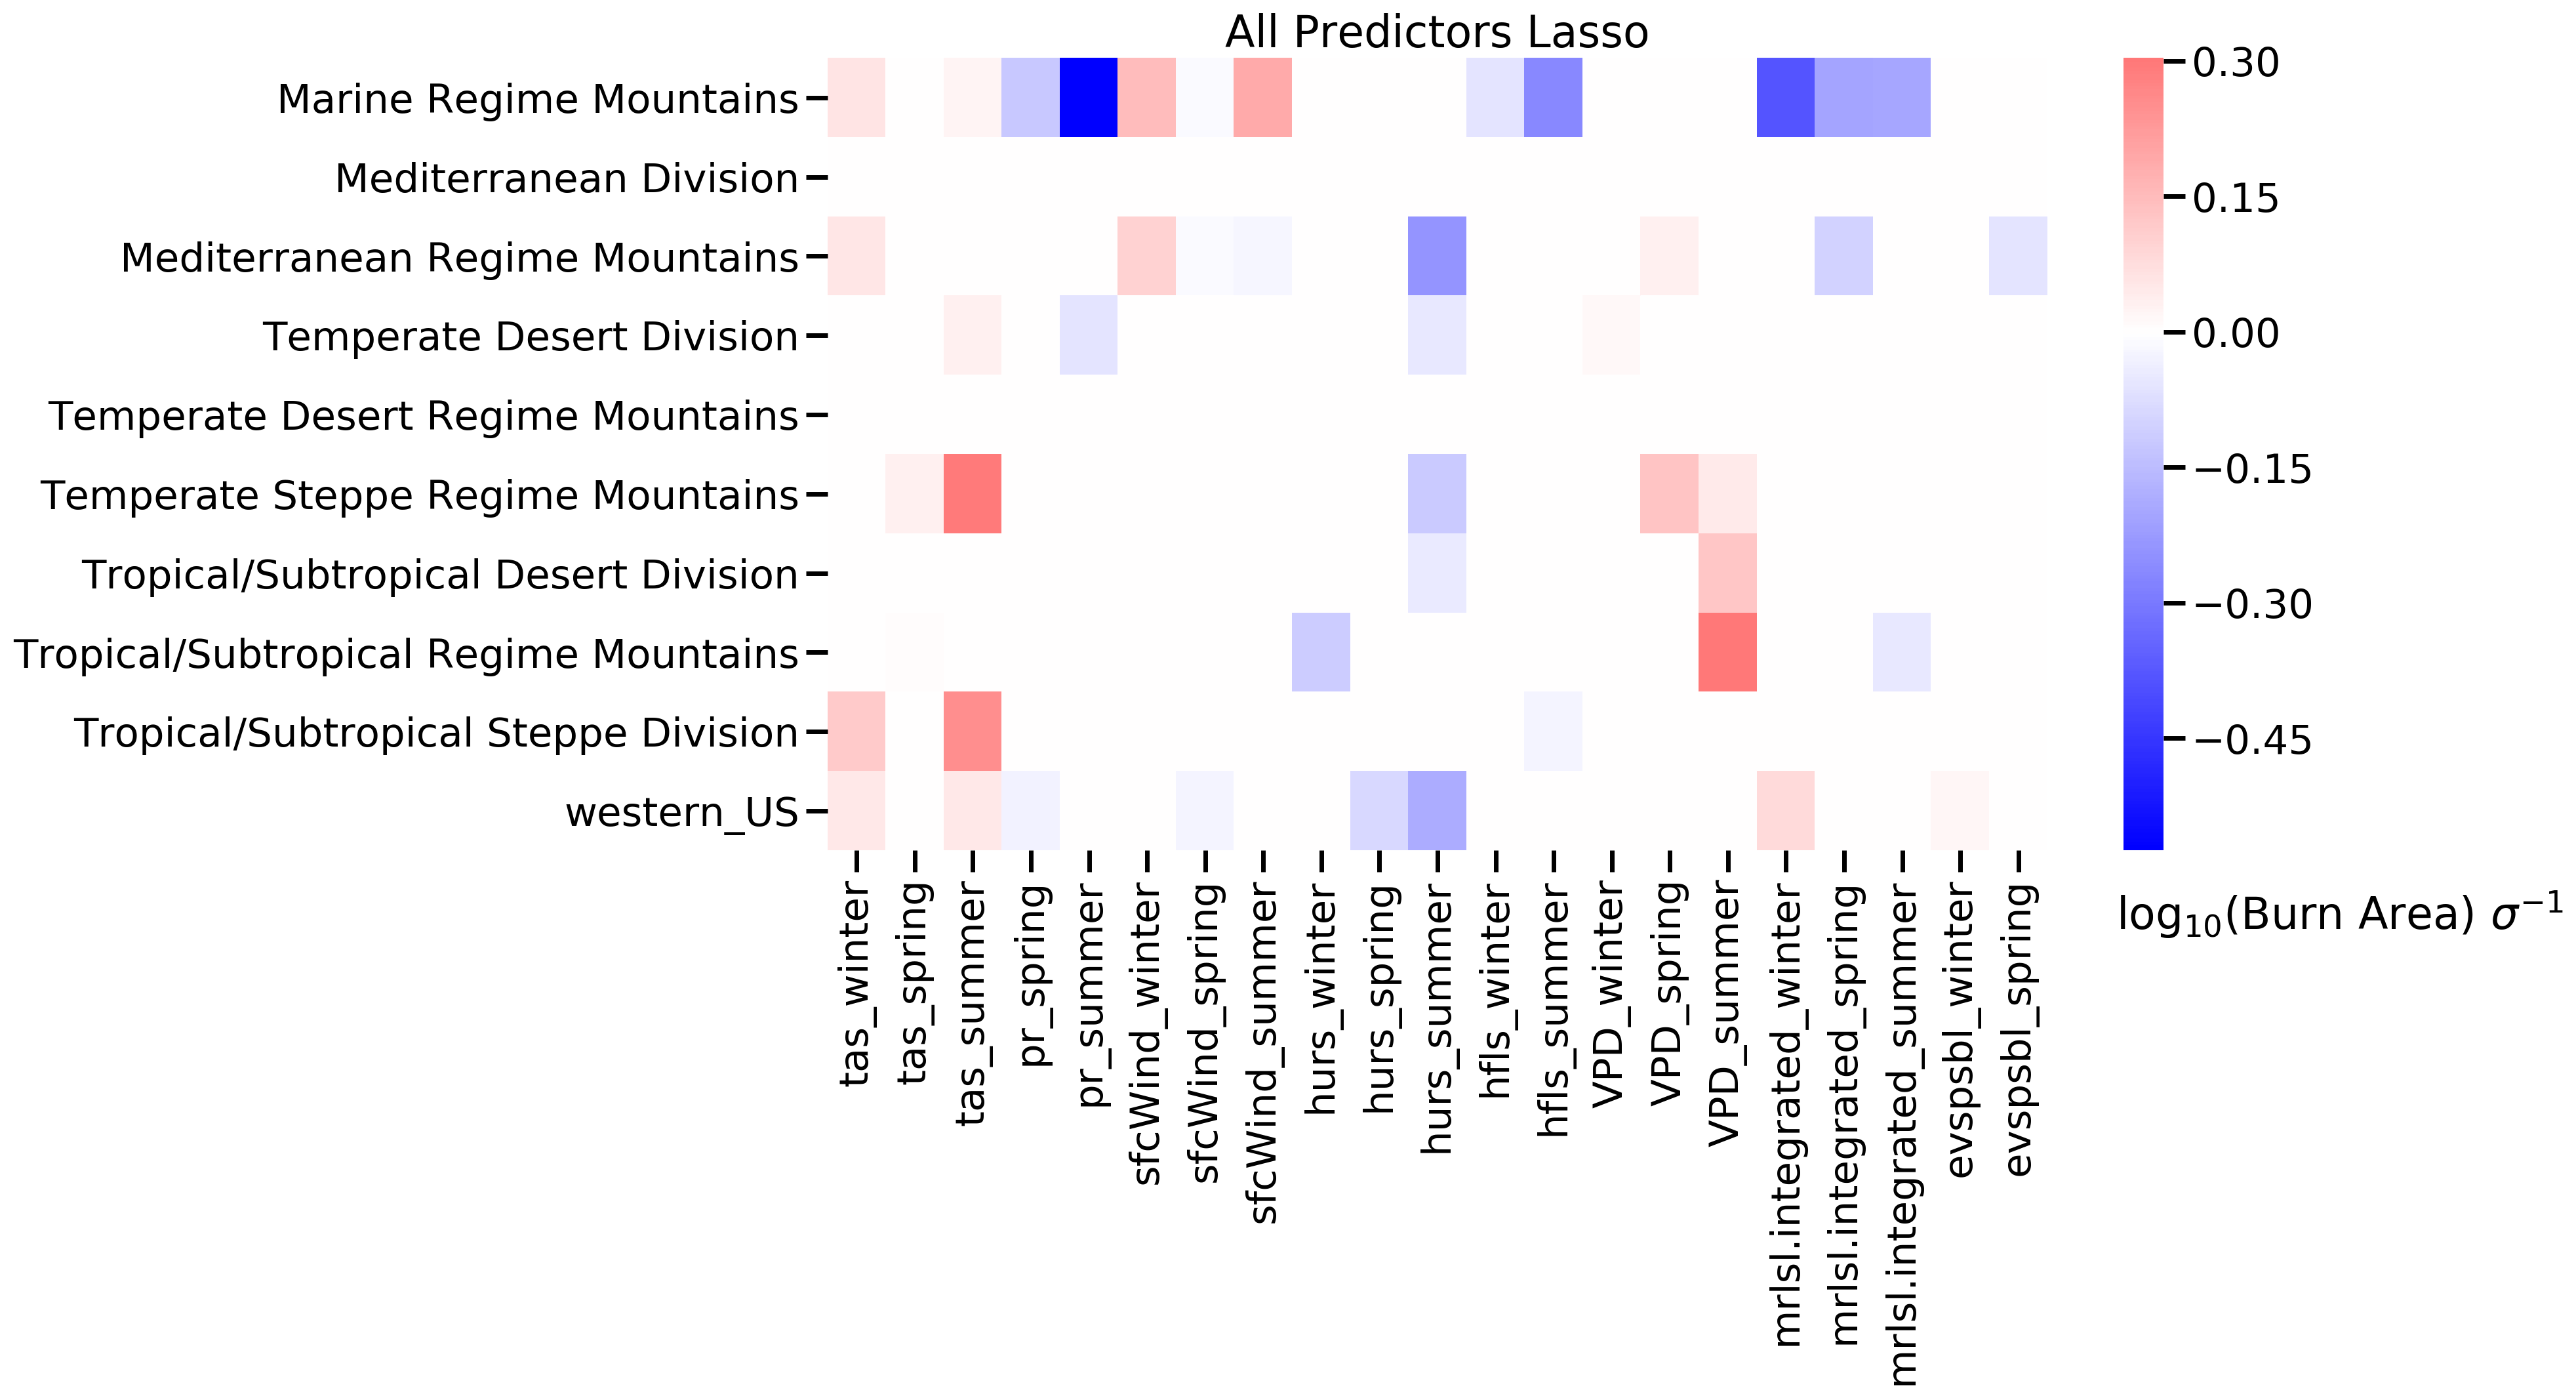

In [14]:
with sns.plotting_context("poster") :
    # TODO: Show r-squared on this plot 
    f, ax = plt.subplots(figsize=(15, 8), dpi=200)
    ax1 = sns.heatmap(lasso_all_coefs, center=0, cmap="bwr")
    ax1.set(xlabel="", ylabel="", title="All Predictors Lasso")
    f.text(x=0.78, y=.05, s="log$_{10}$(Burn Area) $\sigma^{-1}$")
    plt.savefig(os.path.join(dataDir, "lasso_all_coefs_heat_matrix.png"), bbox_inches='tight')
    #plt.xticks(rotation=80)
    plt.show()

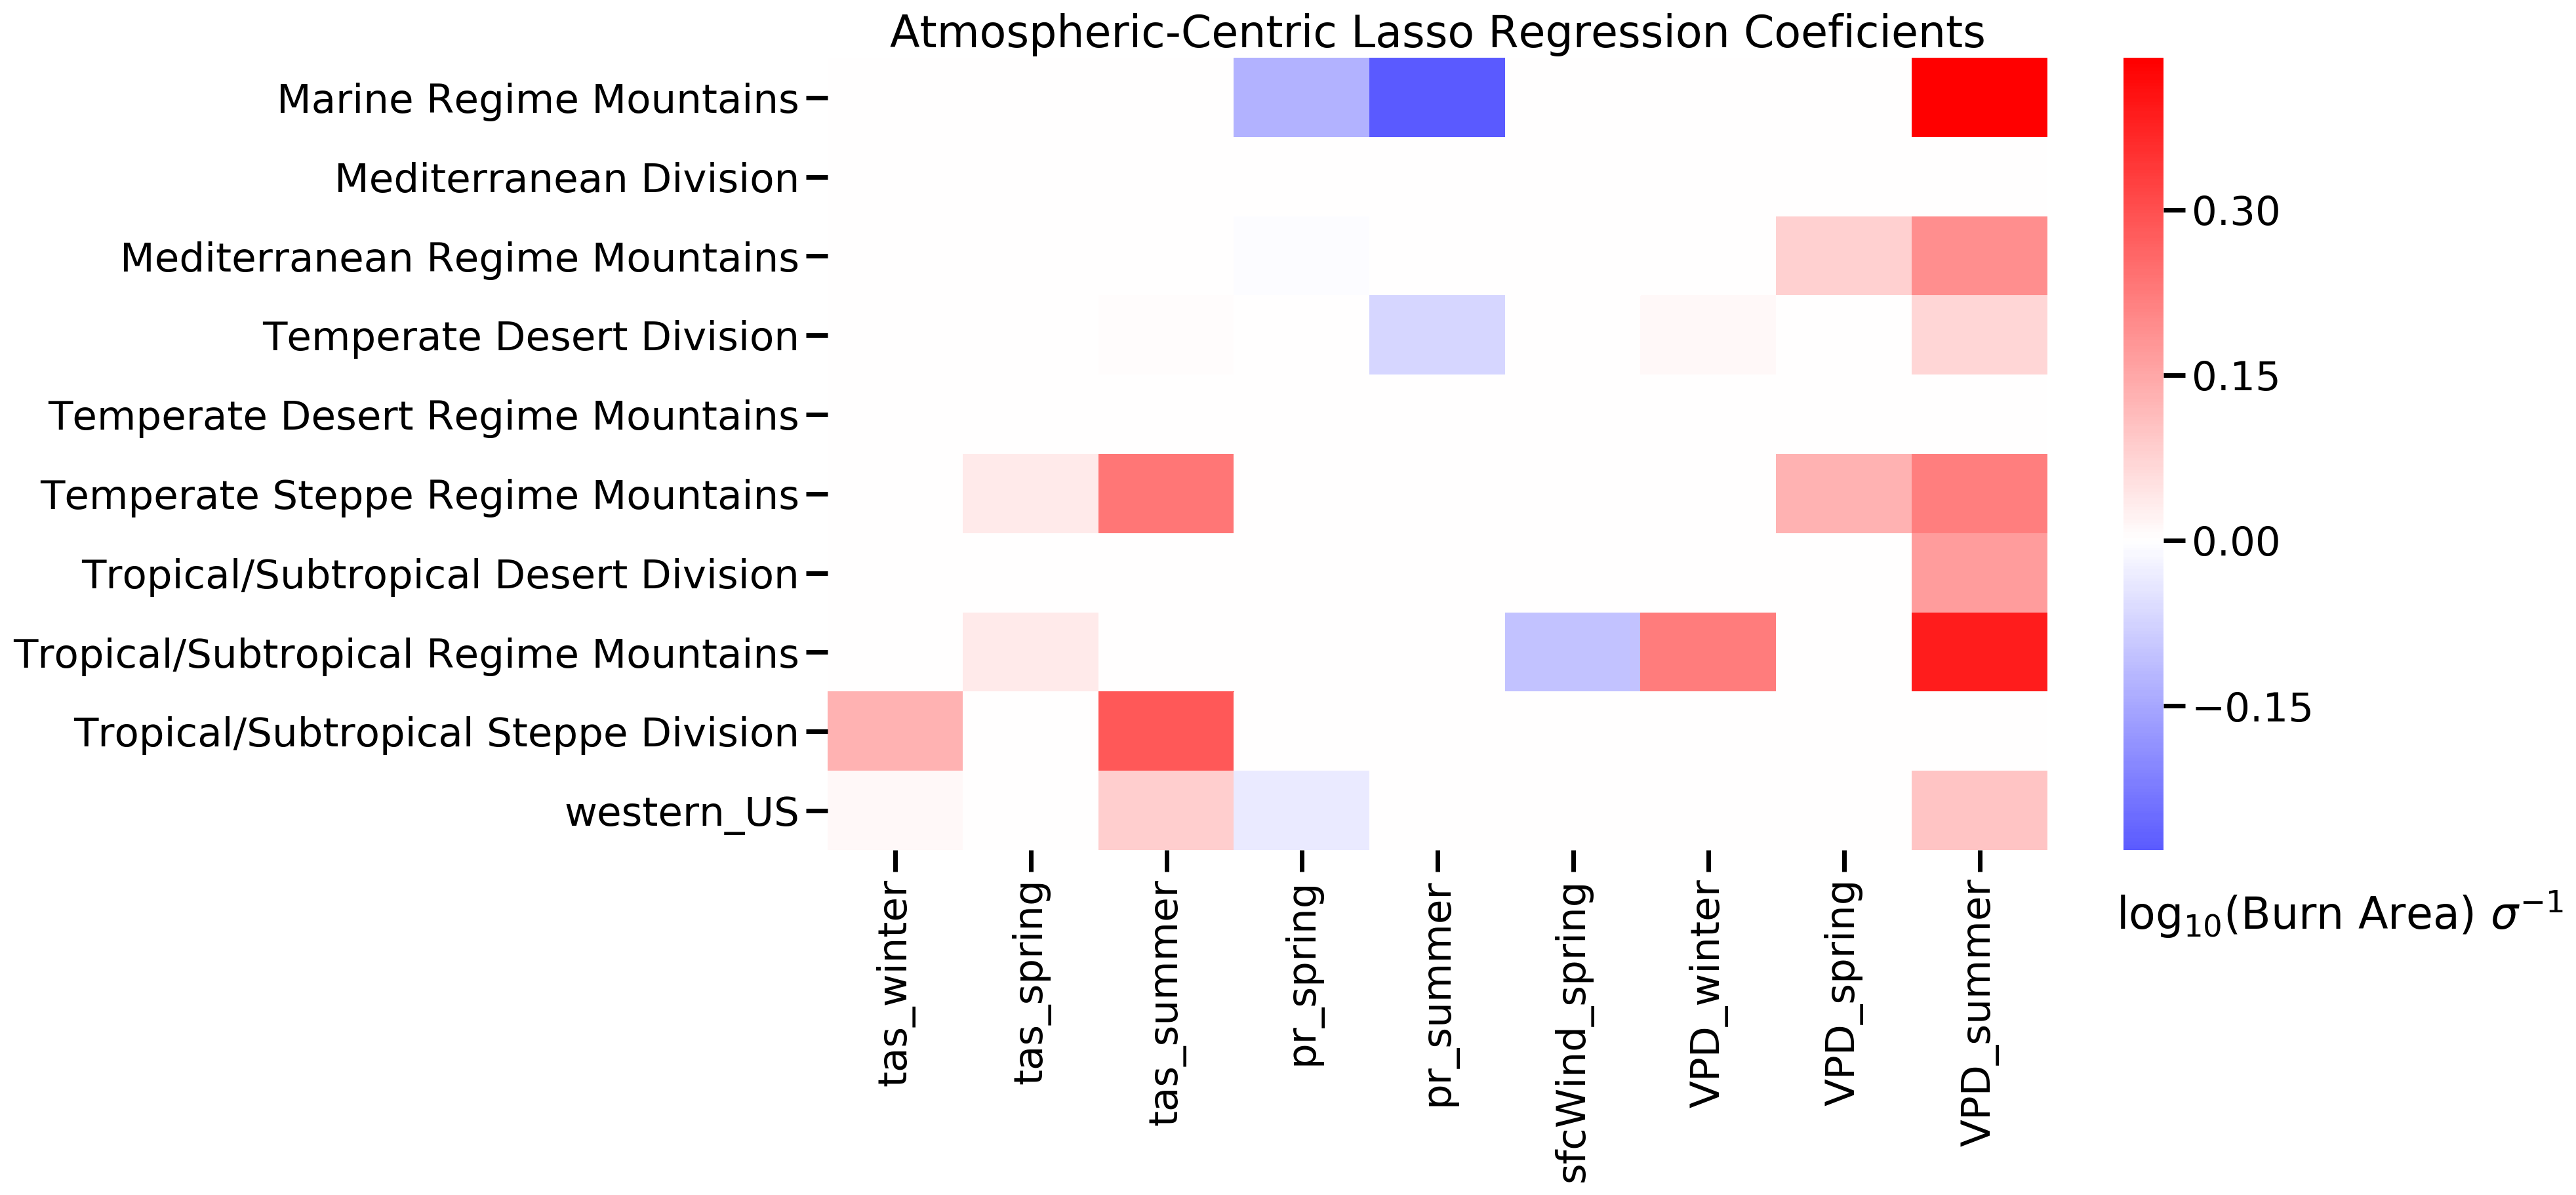

In [15]:
with sns.plotting_context("poster") :
    # TODO: Show r-squared on this plot 
    f, ax = plt.subplots(figsize=(15, 8), dpi=200)
    ax1 = sns.heatmap(lasso_atmos_coefs, center=0, cmap="bwr")
    ax1.set(xlabel="", ylabel="", title="Atmospheric-Centric Lasso Regression Coeficients")
    f.text(x=0.78, y=.05, s="log$_{10}$(Burn Area) $\sigma^{-1}$")
    plt.savefig(os.path.join(dataDir, "lasso_atmos_coefs_heat_matrix.png"), bbox_inches='tight')
    plt.show()

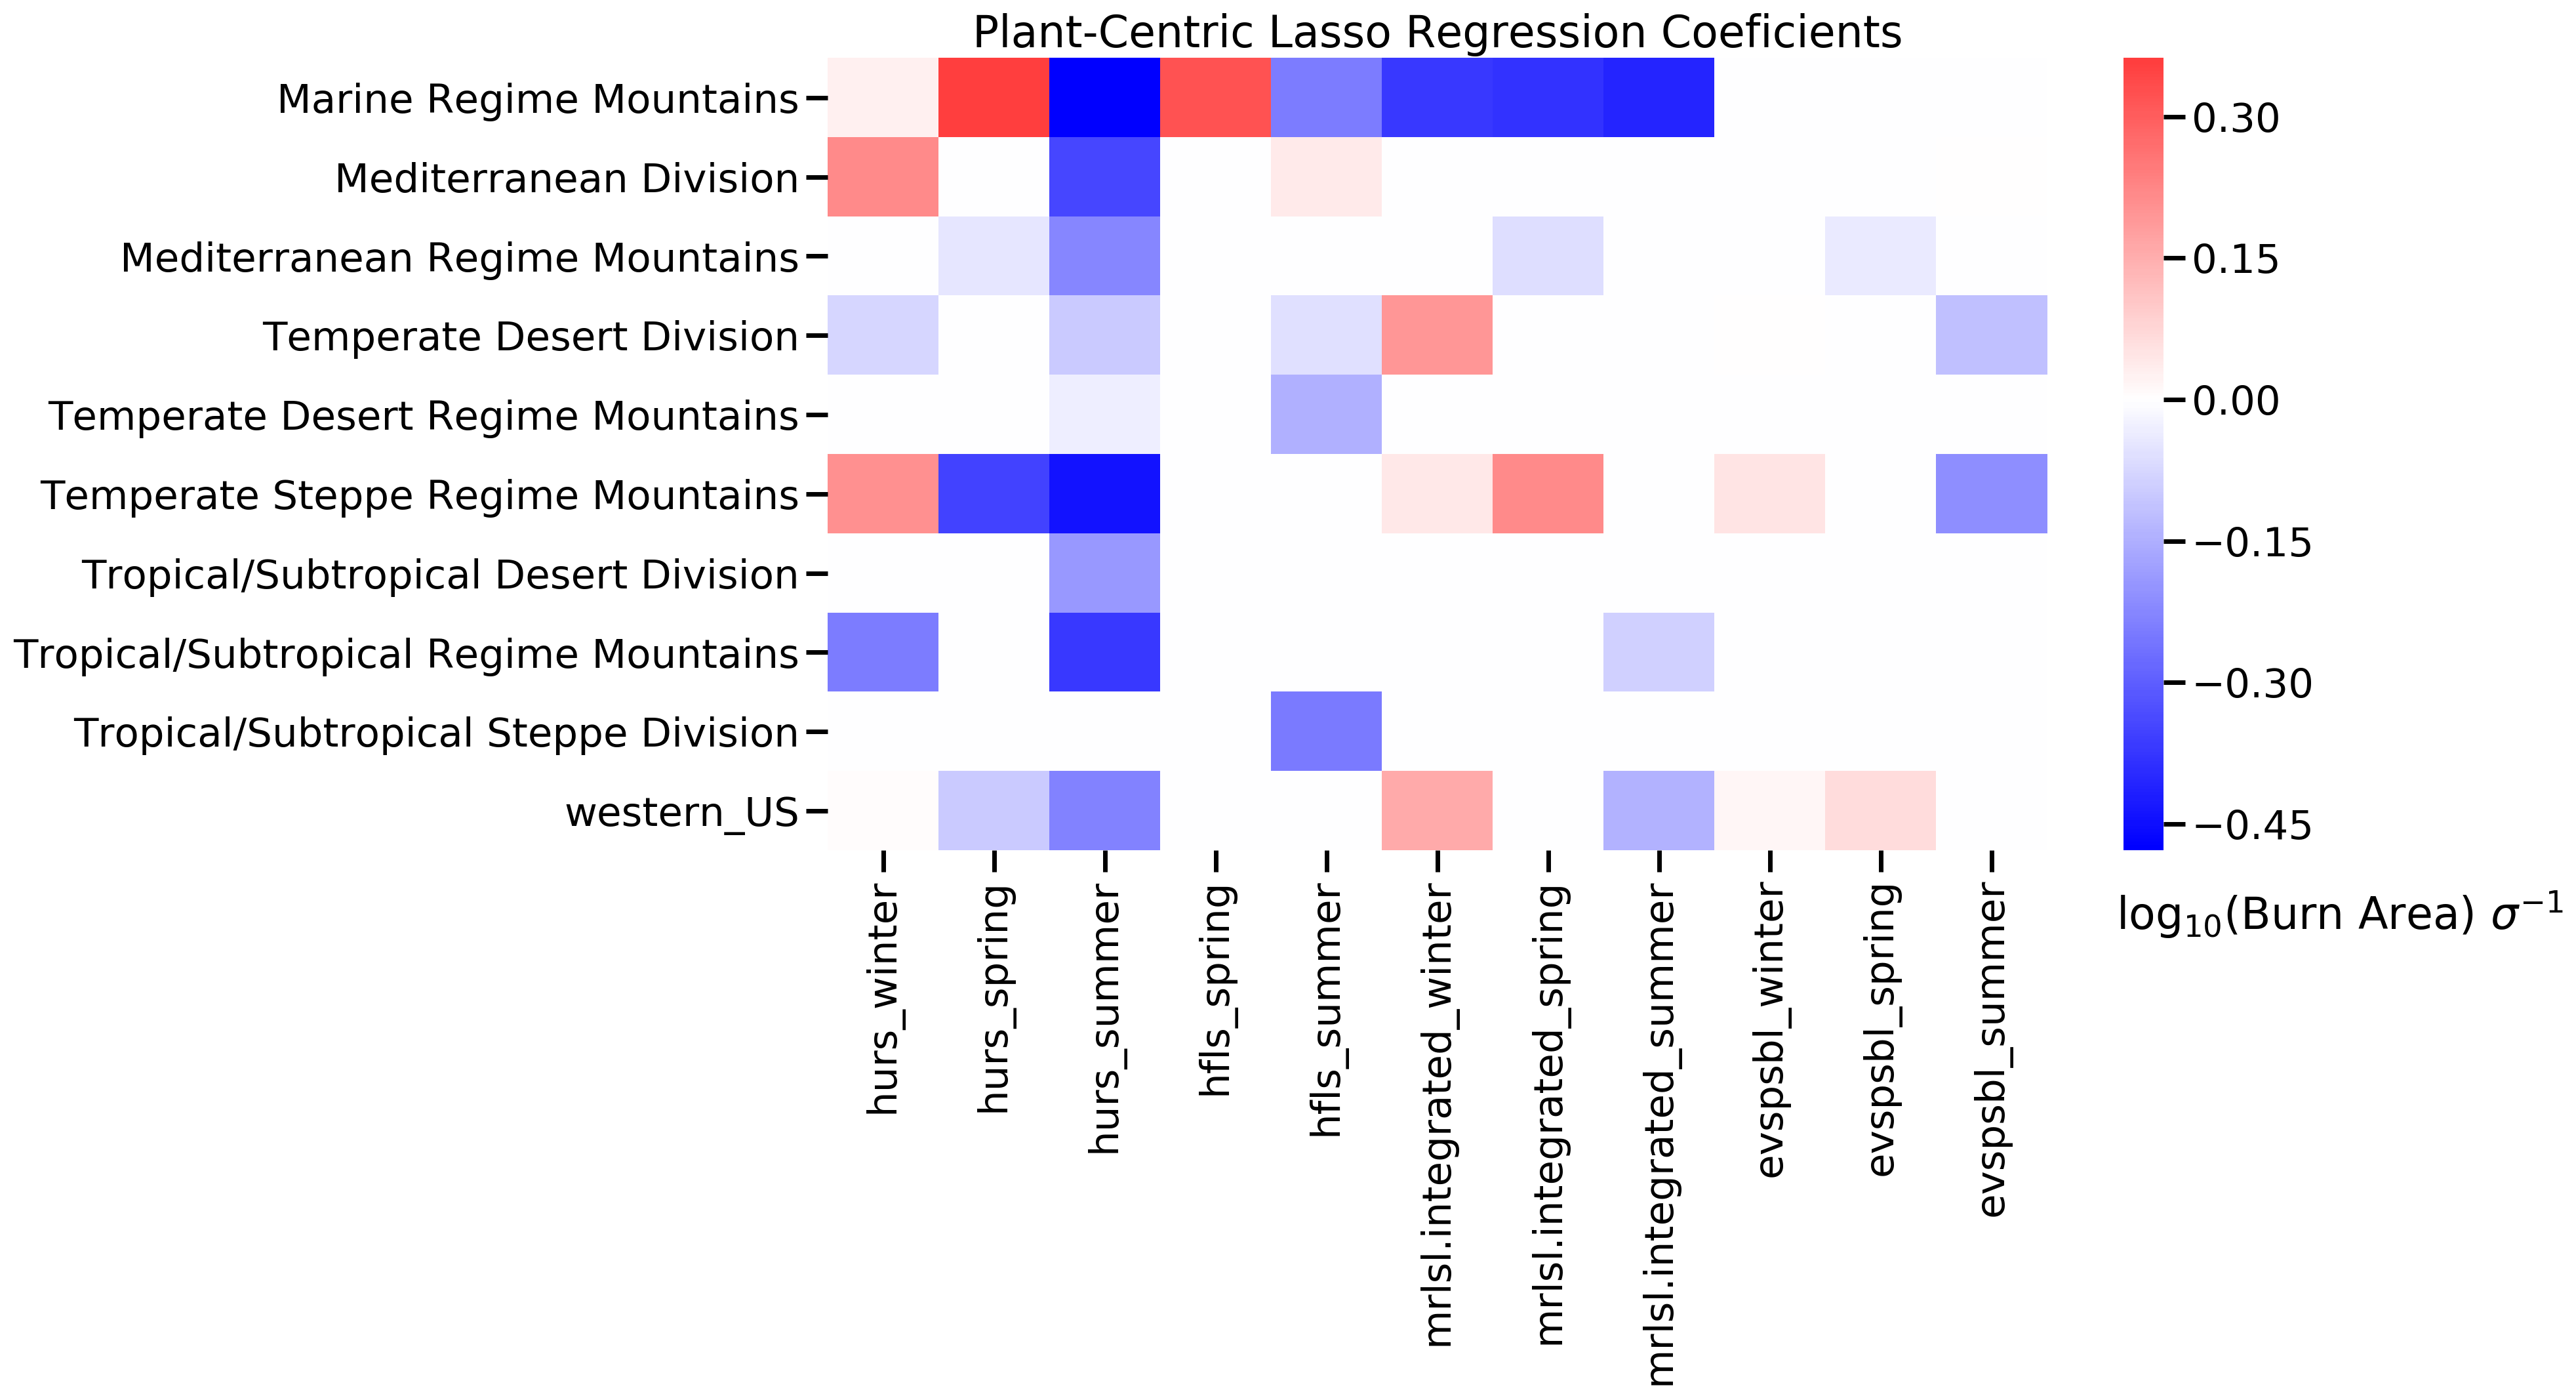

In [16]:
with sns.plotting_context("poster") :
    # TODO: Show r-squared on this plot 
    f, ax = plt.subplots(figsize=(15, 8), dpi=200)
    ax1 = sns.heatmap(lasso_plant_coefs, center=0, cmap="bwr")
    ax1.set(xlabel="", ylabel="", title="Plant-Centric Lasso Regression Coeficients")
    f.text(x=0.78, y=.05, s="log$_{10}$(Burn Area) $\sigma^{-1}$")
    plt.savefig(os.path.join(dataDir, "lasso_plant_coefs_heat_matrix.png"), bbox_inches='tight')
    plt.show()

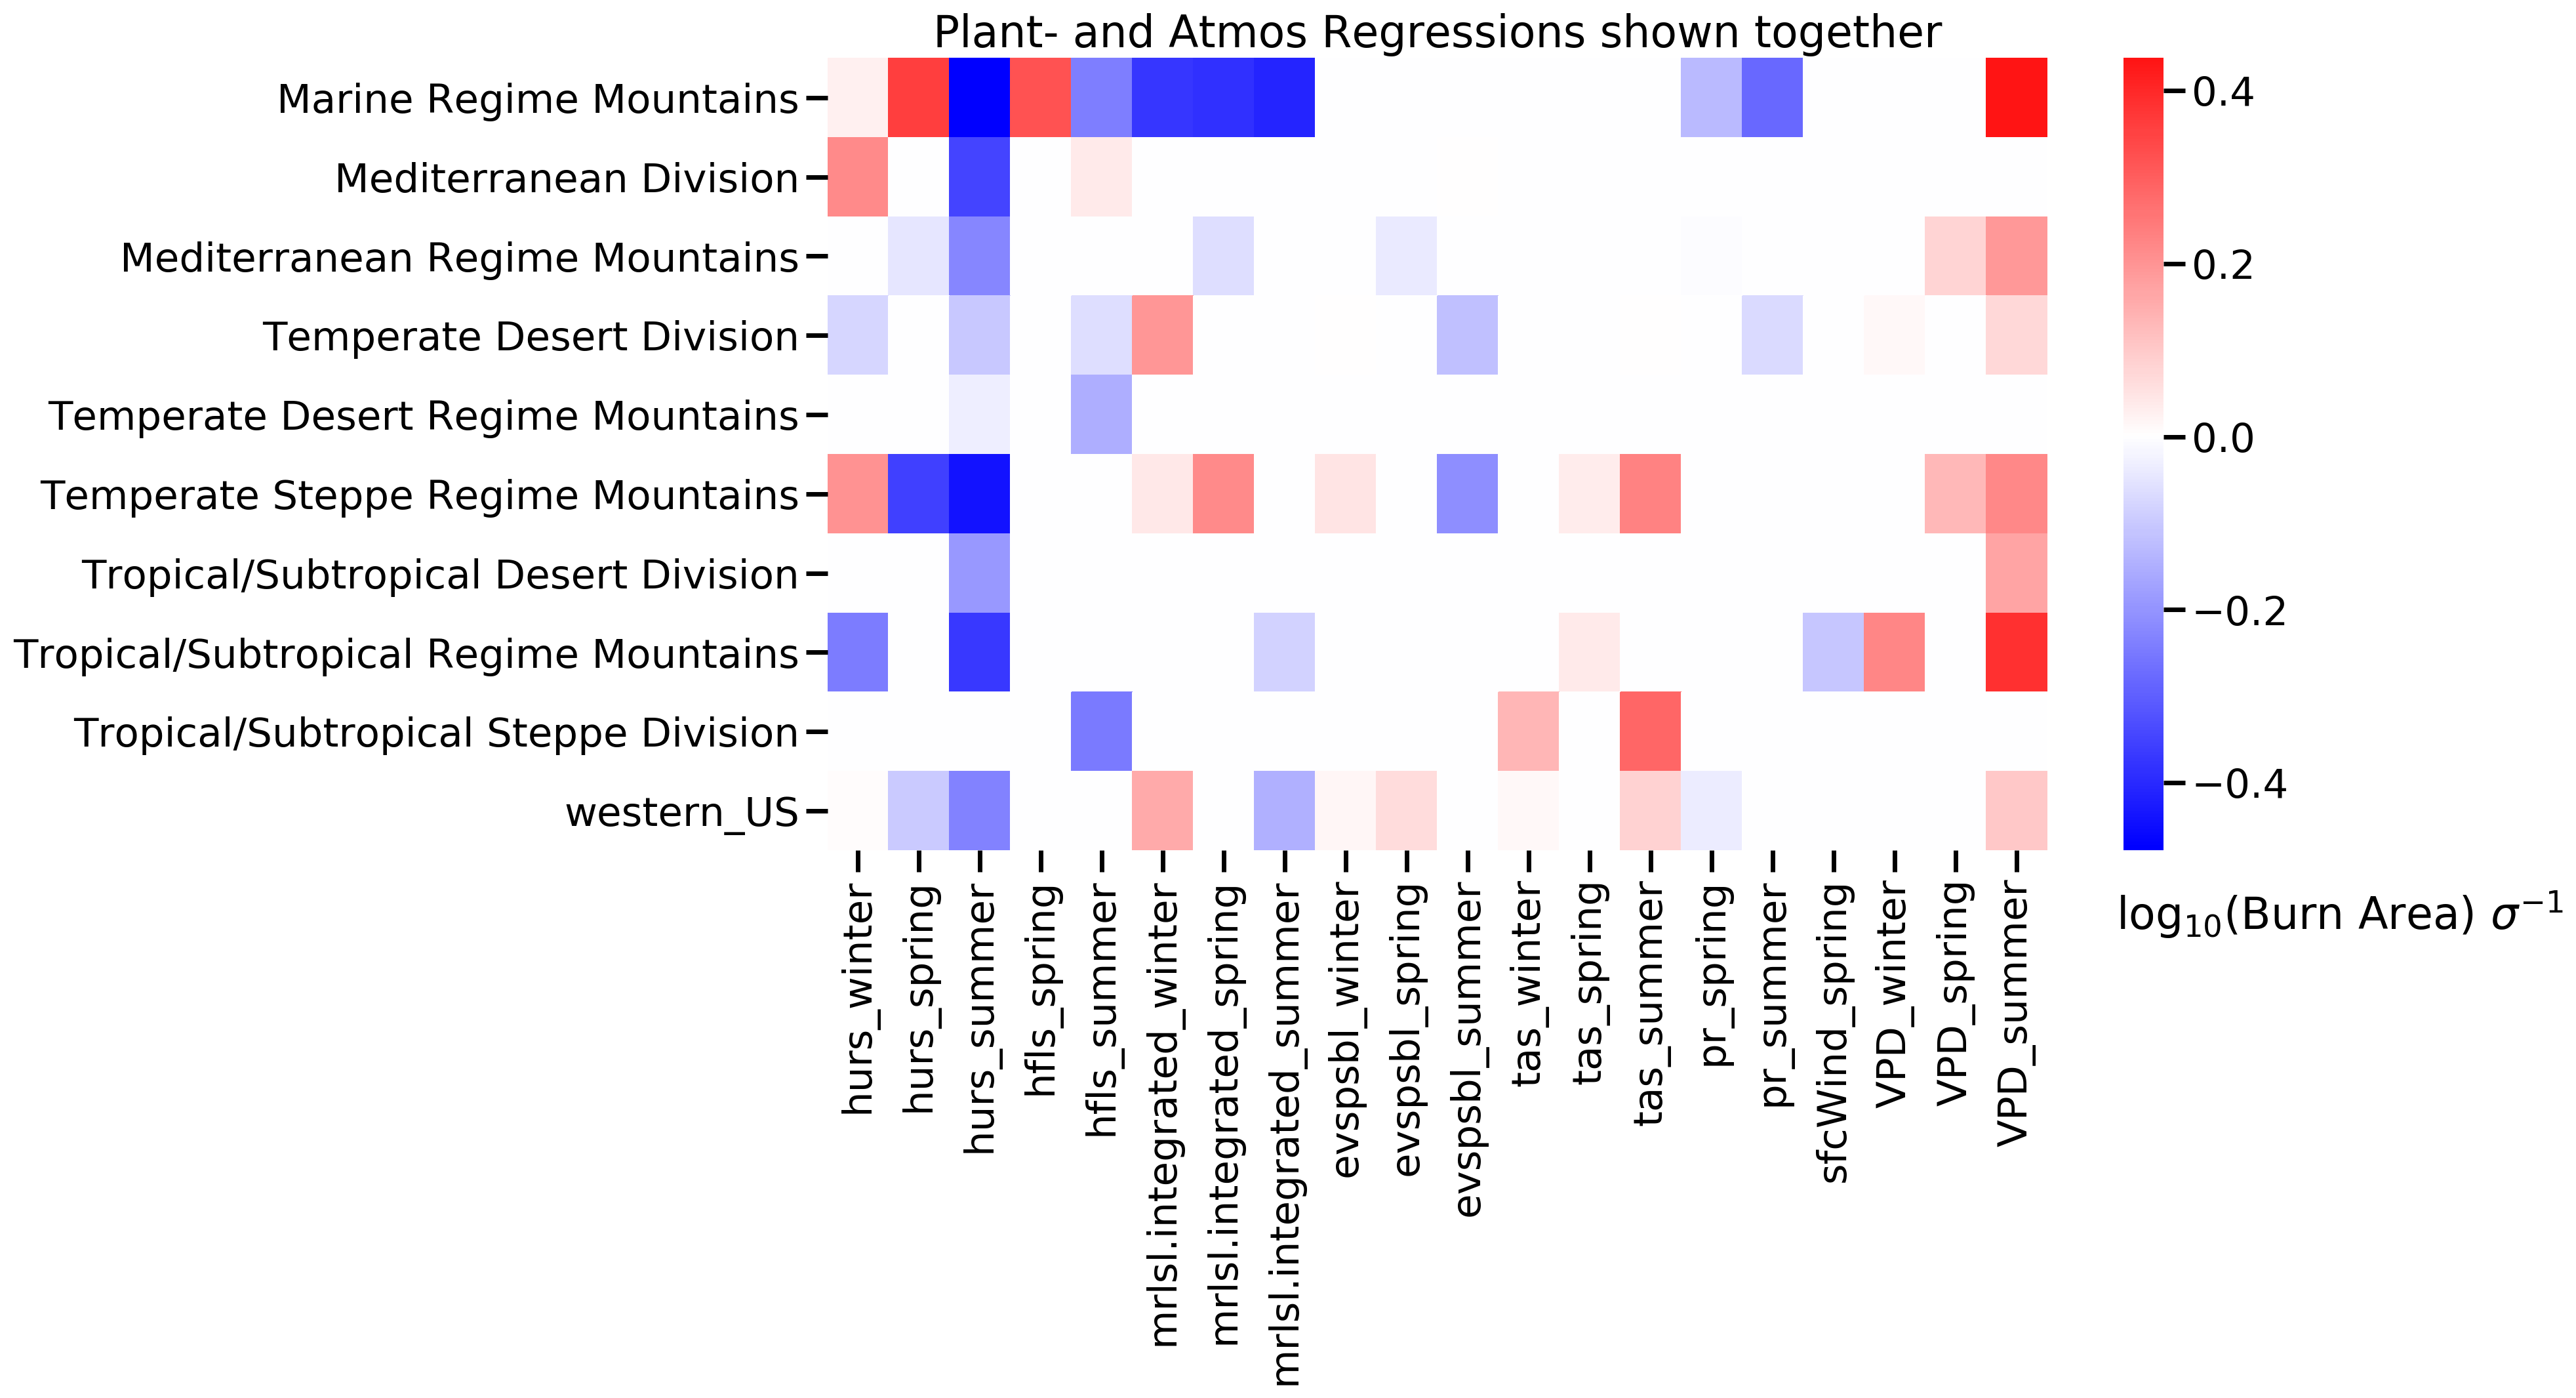

In [17]:
with sns.plotting_context("poster") :
    # TODO: Show r-squared on this plot 
    f, ax = plt.subplots(figsize=(15, 8), dpi=200)
    ax1 = sns.heatmap(lasso_combined_coefs, center=0, cmap="bwr")
    ax1.set(xlabel="", ylabel="", title="Plant- and Atmos Regressions shown together")
    f.text(x=0.78, y=.05, s="log$_{10}$(Burn Area) $\sigma^{-1}$")
    plt.savefig(os.path.join(dataDir, "lasso_combined_coefs_heat_matrix.png"), bbox_inches='tight')
    plt.show()

In [18]:
R2_df = pd.DataFrame(divisions[["OLS_r2","lasso_r2", "atmos_r2", "plant_r2"]])
R2_df.rename(columns={"OLS_r2":"OLS", 
                      "lasso_r2":"Lasso All",
                      "atmos_r2":"Lasso Atmospheric",
                      "plant_r2":"Lasso Plant"}, 
                     inplace=True)
R2_df

,OLS,Lasso All,Lasso Atmospheric,Lasso Plant
division,,,,
Marine Regime Mountains,0.897215,0.753946,0.433673,0.680978
Mediterranean Division,0.665681,0.000000,0.000000,0.267405
Mediterranean Regime Mountains,0.903428,0.629452,0.411734,0.516781
Temperate Desert Division,0.941299,0.232390,0.228548,0.402309
Temperate Desert Regime Mountains,0.635455,0.000000,0.000000,0.087532
Temperate Steppe Regime Mountains,0.946076,0.739835,0.738005,0.772443
Tropical/Subtropical Desert Division,0.883064,0.273077,0.269205,0.279687
Tropical/Subtropical Regime Mountains,0.652272,0.235923,0.285390,0.271781
Tropical/Subtropical Steppe Division,0.716379,0.240593,0.247529,0.158589


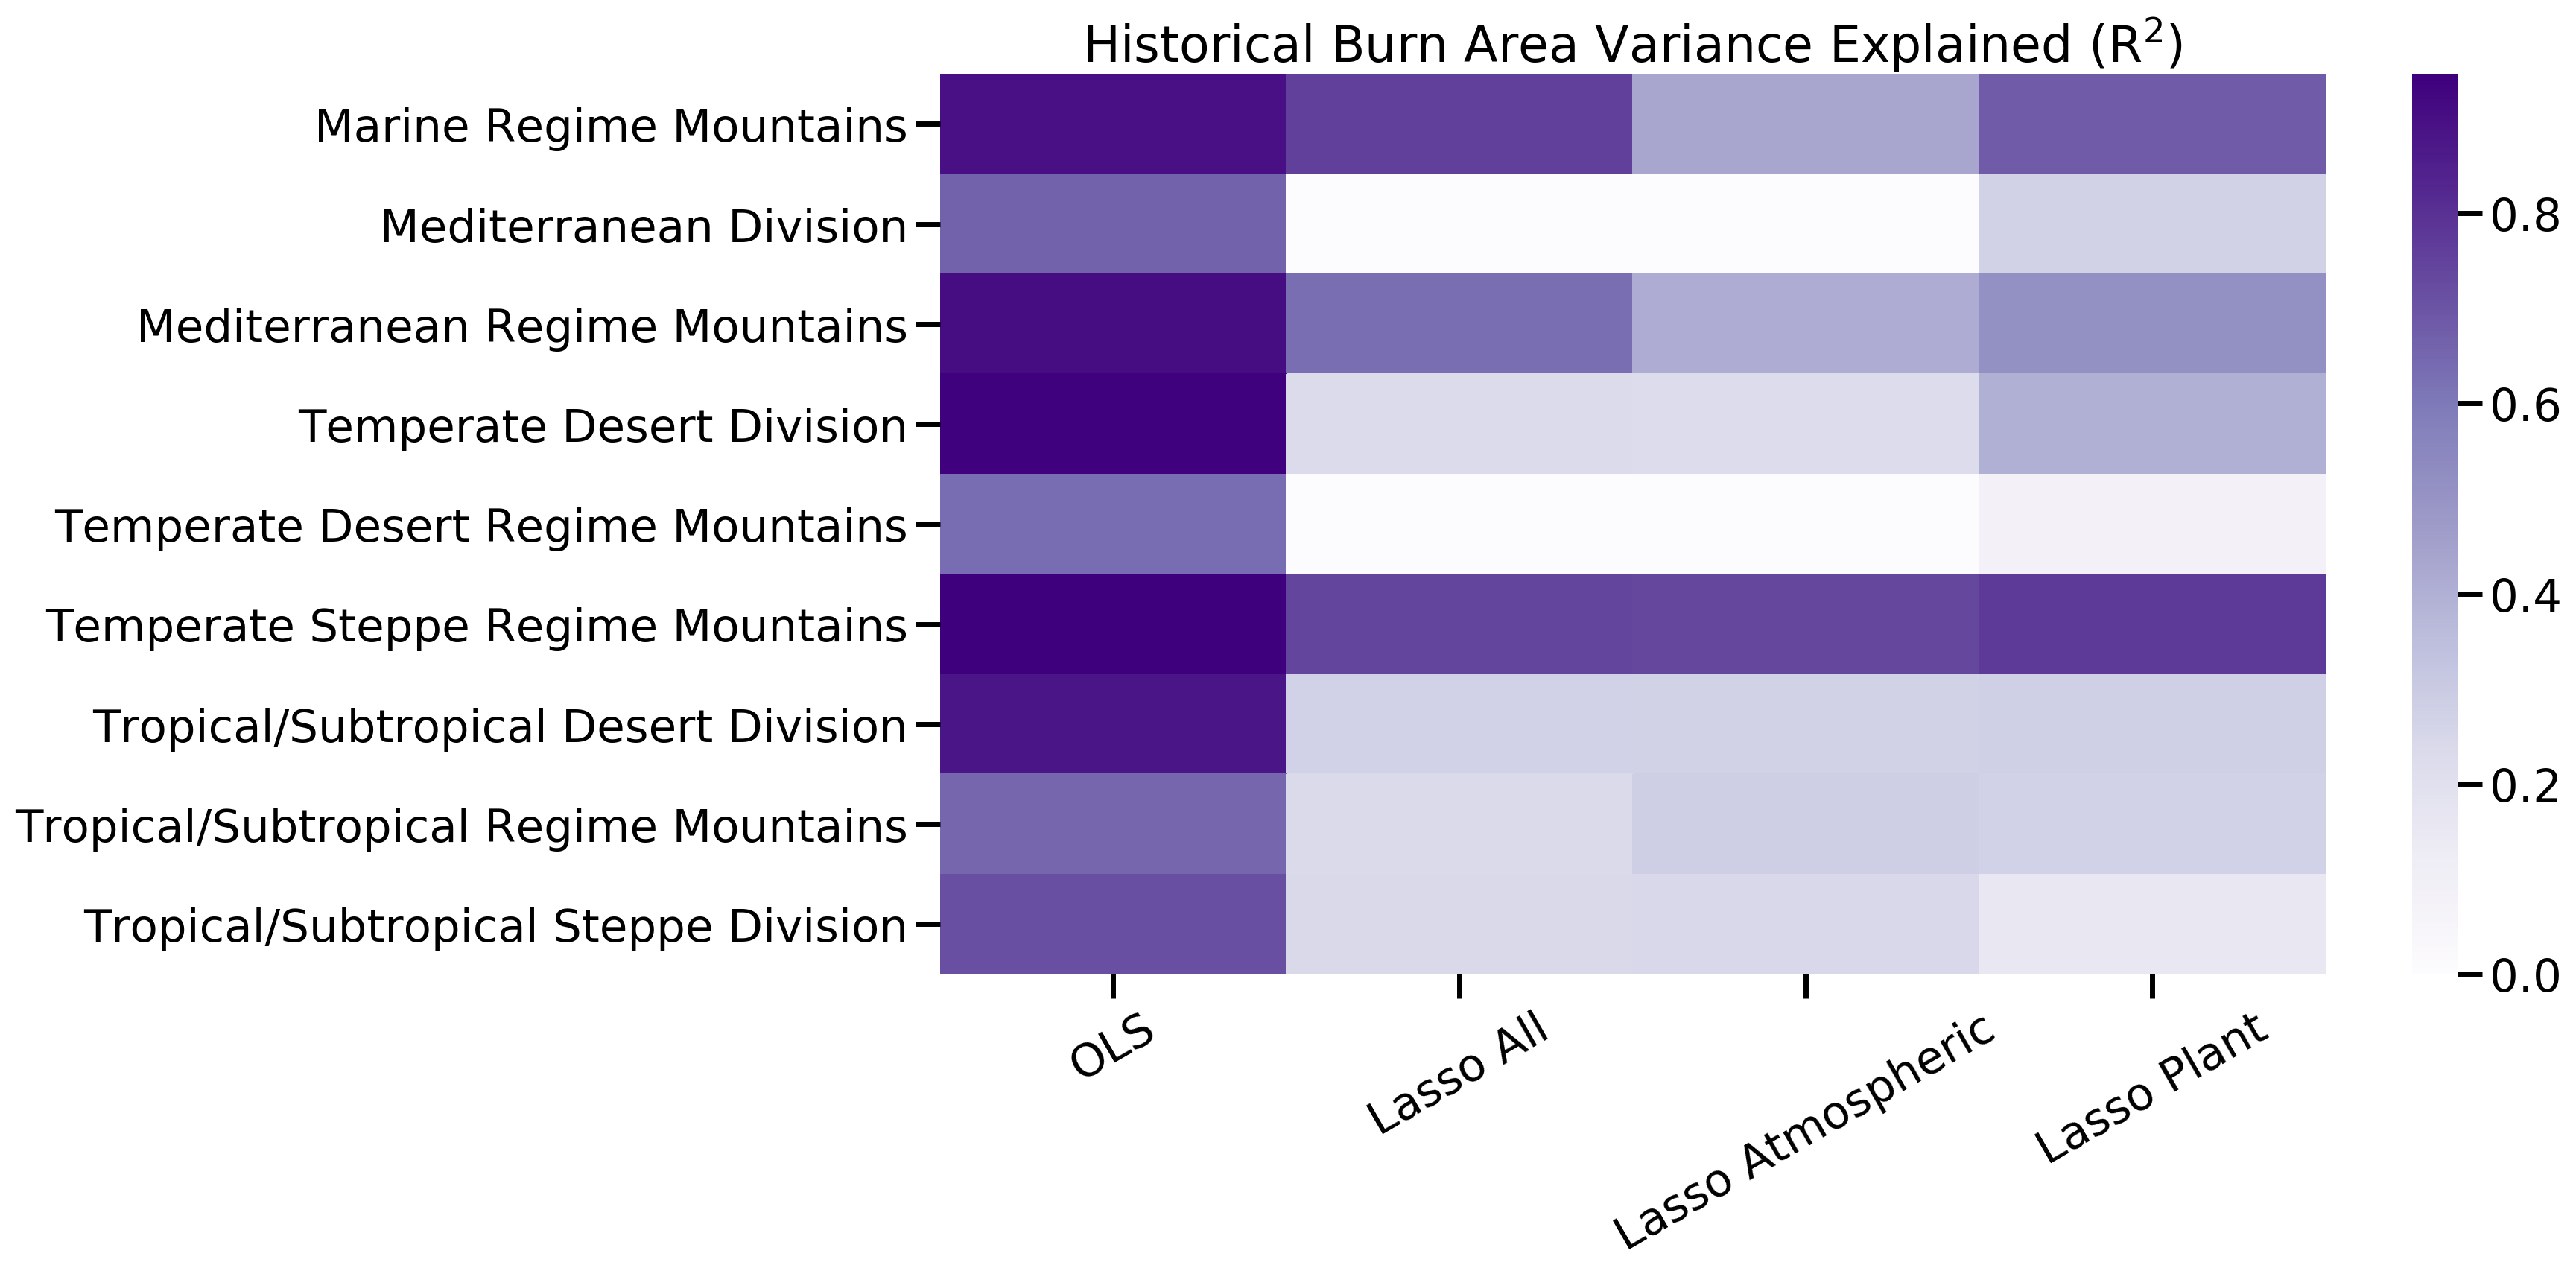

In [19]:
with sns.plotting_context("poster") :
    f, ax = plt.subplots(figsize=(15, 8), dpi=200)
    ax1 = sns.heatmap(R2_df, cmap="Purples")
    ax1.set(xlabel="", ylabel="", title="Historical Burn Area Variance Explained (R$^{2}$)")
    ax1.set_xticklabels(labels=R2_df.columns , rotation=30)
    #ax1.collections[0].colorbar.set_label("R$^{2}$")
    plt.savefig(os.path.join(dataDir,"models_variance_explained_heatmap.png"),  bbox_inches='tight')

Make all three of the above plots work together below. 

# Show predictor importance and variance
- NOTE: lasso_combined_coefs does not have columns in the same order as Z_dict of era-interim, so make sure that you account for that when reading data in function below. 

In [20]:
def get_cmip5_Z_dict(regression_name, rcp) :
    """
    Function for loading pickled CMIP5 dictionaries. Returns 
    dictionary associated with the specified file name. 
    """
    
    # Get the CMIP5 features expressed in terms of historical variance "Z_dict"
    # or their raw values averaged in a region ""
    f = regression_name + "_Z_cmip_" + rcp + '_dict.obj'
    print("Getting " + f)
    with open(os.path.join(dataDir, f), 'rb') as fp:
        Z_cmip_dict = pickle.load(fp)
    return Z_cmip_dict 

In [21]:
def create_scatter_df(div, coef_df, dataDir, div_Z_dict,  y1=2070, y2=2099) :  

    """
    Description + notes
    Parameters
    ----------
    """
        
    # Get the division coeficients, only where non-zero
    df = coef_df.loc[div, coef_df.loc[div] != 0 ].copy()

    # Set up the DataFrame to hold information for scatterploting for div
    col_names = ["division", "feature", "feature_N", "feature_type", "coef", 
                 "CMIP5_mean", "CMIP5_std","CMIP5_min", "CMIP5_max"]
    df_scatter = pd.DataFrame(index=df.index, columns=col_names)
    df_scatter["division"]  = div
    df_scatter["feature_N"] = len(div_Z_dict.keys()) # models with all features for division 
    df_scatter["feature"]   = df_scatter.index.values.copy()
    df_scatter["coef"]      = df.values.copy()

    for model in div_Z_dict.keys() : 

        # Assign CMIP5 stats where they belong here. 
        Z_cmip = div_Z_dict[model]

        # We want the values for the last 30 years of 21st century
        # TODO: make time period a variable 
        future_mean_sigma = Z_cmip.loc[y1:y2, :].mean() # mean of columns, here variables 

        # Get the future sigma for the variables with non-zero coefs 
        # Add the new column for the data from THIS model 
        df_scatter[model] = future_mean_sigma[df_scatter.index]
            
    # Get the stats on the rows from the model sigma output
    model_columns = list(div_Z_dict.keys())
    df_scatter.loc[:, "CMIP5_mean"] = df_scatter[model_columns].mean(axis=1).copy()
    df_scatter.loc[:, "CMIP5_std"] = df_scatter[model_columns].std(axis=1).copy()
    df_scatter.loc[:, "CMIP5_min"] = df_scatter[model_columns].min(axis=1).copy()
    df_scatter.loc[:, "CMIP5_max"] = df_scatter[model_columns].max(axis=1).copy()
    
    # Assign feature types
    # TODO: Pass these in
    plant_vars = ['mrlsl.integrated', 'evspsbl', 'hurs', 'hfls'] 
    atmos_vars = ['tas', 'VPD', 'pr', 'sfcWind']       
    
    for i in df_scatter["feature"] : 
        #print(i)
        s = pd.Series(i.split("_")[0]).isin(plant_vars).values
        #print(s)
        if  s : 
            df_scatter.loc[i, "feature_type"] = "Plant-Centric"
        else :
            df_scatter.loc[i, "feature_type"] = "Atmos-Centric"
            
    return df_scatter 

In [30]:
def plot_coef_vs_std(div, dataDir, regression_name, df_scatter, y1=2070, y2=2099) :  

    """
    Description + notes
    """
    
    figure_savename = os.path.join(dataDir, regression_name + "_" + div.replace("/", " ") + "_coefs_vs_std.png")
    title_text = "CMIP5 $\mu_{"+str(y1)+"-"+str(y2)+"}$ - ERA-Interim $\mu_{1984-2016}$"    
    
    ############################
    # Data ready, begin plotting 
    ############################
    fig = plt.figure(dpi=250, figsize=(4, 4))
    ax = sns.scatterplot(x="coef", y="CMIP5_mean", hue="feature", 
                         style="feature_type", data=df_scatter)
    
    #ax.axis('off')
    #ax.axhline(y=1, color="gray", linestyle="--", linewidth=0.5)
    ax.axhline(y=0, color="k", linestyle="--", linewidth=0.8)
    #ax.axhline(y=-1, color="gray", linestyle="--", linewidth=0.5)

    ax.axvline(x=0, color="k", linestyle="--", linewidth=0.8)

    ax.legend( bbox_to_anchor=(1,1.), title="", frameon=False)
    ax.set(xlabel='Regression Coefficient [log$_{10}$(Burn Area) $\sigma^{-1}$]', 
           ylabel='$\Delta$  [$\sigma$$_{1984-2016}$]')
    plt.title(label=title_text, fontsize=9)
    #plt.set.title_text(fontsize=14)
    plt.suptitle(div)

    # Calculate the error (spread extent) bars for each variable
    error = np.zeros(shape=(2, len(df_scatter['CMIP5_min'])))
    lower_ext = df_scatter["CMIP5_mean"] - df_scatter['CMIP5_min']  # how far below 
    upper_ext = df_scatter['CMIP5_max'] - df_scatter["CMIP5_mean"]  # how far above 
    error[0][:] = np.array(lower_ext)
    error[1][:] = np.array(upper_ext)

    ax.errorbar(df_scatter["coef"], df_scatter["CMIP5_mean"], fmt=' ', 
                yerr=error, capsize=2, linewidth=0.5)

    plt.savefig(figure_savename, bbox_inches='tight')
    plt.close()
    
    #return df_scatter

### plot_coef_vs_std() for lasso_all regressions

In [31]:
lasso_all_Z_cmip_dict = get_cmip5_Z_dict(regression_name='lasso_all', rcp='85')

for div in lasso_all_Z_cmip_dict.keys() : 
    print(div)
    # Create scatter_df
    df_scatter = create_scatter_df(div, lasso_all_coefs, dataDir, lasso_all_Z_cmip_dict[div])
    plot_coef_vs_std(div, dataDir, "lasso_all", df_scatter)

Getting lasso_all_Z_cmip_85_dict.obj
Marine Regime Mountains
Temperate Desert Division
Temperate Steppe Regime Mountains
Tropical/Subtropical Desert Division
Tropical/Subtropical Steppe Division
Tropical/Subtropical Regime Mountains
Mediterranean Regime Mountains


No handles with labels found to put in legend.


Mediterranean Division


No handles with labels found to put in legend.


Temperate Desert Regime Mountains
western_US


### plot_coef_vs_std() for lasso_combined regressions by merging plant and atmos

In [32]:
lasso_plant_Z_cmip_dict = get_cmip5_Z_dict(regression_name='lasso_plant', rcp='85')
lasso_atmos_Z_cmip_dict = get_cmip5_Z_dict(regression_name='lasso_atmos', rcp='85')

Getting lasso_plant_Z_cmip_85_dict.obj
Getting lasso_atmos_Z_cmip_85_dict.obj


In [36]:
for div in lasso_all_Z_cmip_dict.keys() : 
    print(div)
    df_1 = create_scatter_df(div, lasso_plant_coefs, dataDir, lasso_plant_Z_cmip_dict[div])
    df_2 = create_scatter_df(div, lasso_atmos_coefs, dataDir, lasso_atmos_Z_cmip_dict[div])
    df_scatter = pd.concat([df_1, df_2], axis=0, sort=False)
    plot_coef_vs_std(div,  dataDir, "lasso_combined", df_scatter)

Marine Regime Mountains
Temperate Desert Division
Temperate Steppe Regime Mountains
Tropical/Subtropical Desert Division
Tropical/Subtropical Steppe Division
Tropical/Subtropical Regime Mountains
Mediterranean Regime Mountains
Mediterranean Division
Temperate Desert Regime Mountains
western_US


Possible way to make ranked boxplot needed. 
https://stackoverflow.com/questions/39214484/how-to-rank-plot-in-seaborn-boxplot